<a href="https://colab.research.google.com/github/srigstinahf/Prediksi-RNN-LSTM-TFT-/blob/main/RNN_prediksi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 216.2355 - val_loss: 240.2050
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 114.2935 - val_loss: 183.3035
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 86.7867 - val_loss: 152.4583
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 69.7924 - val_loss: 132.7948
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 64.3451 - val_loss: 116.6025
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 61.3527 - val_loss: 105.7171
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 46.0222 - val_loss: 91.8273
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 42.9707 - val_loss: 78.6953
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 37.2281 - val_loss: 68.1443
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 34.0702 - val_loss: 59.7085
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 28.7542 - val_loss: 53.2209
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━

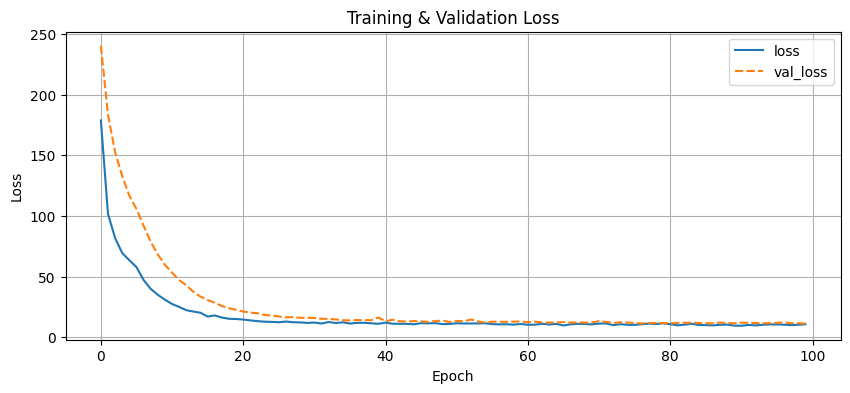

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
📊 Evaluation on Test Set:
MAE  = 2.5764
RMSE = 3.2733
MAPE = 20.59%


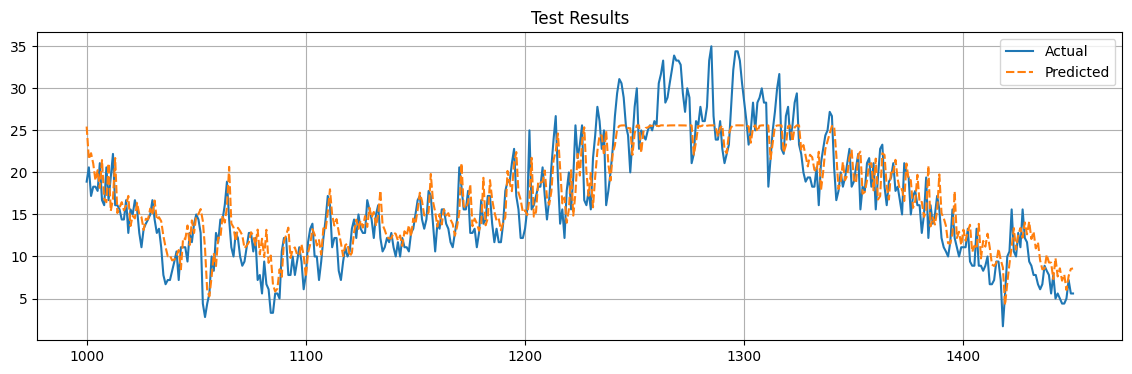

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

df = pd.read_csv('sample_data/dataset seattle-weather.csv')
df.dropna(inplace=True)

training_set = df.iloc[:, 2:3].values

#sliding window
def df_to_XY(data, window_size=10):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

#Parameter window
WINDOW = 10
X, y = df_to_XY(training_set, window_size=WINDOW)

#Split dataset
X_train, y_train = X[:800], y[:800]
X_val, y_val = X[800:1000], y[800:1000]
X_test, y_test = X[1000:], y[1000:]

#Reshape ke 3 dimensi [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

#Build RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

#Train
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

#Plot loss
loss_df = pd.DataFrame(history.history)
plt.figure(figsize=(10, 4))
sns.lineplot(data=loss_df[['loss', 'val_loss']])
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

#Predict
train_pred = model.predict(X_train).flatten()
val_pred = model.predict(X_val).flatten()
test_pred = model.predict(X_test).flatten()

#Gabungkan prediksi
pred = np.concatenate([train_pred, val_pred, test_pred])
actual = training_set[WINDOW:].flatten()

eval_df = pd.DataFrame({
    "Actual": actual,
    "Predicted": pred
})

#Evaluasi
test_actual = actual[1000:]
test_predicted = test_pred

mae = mean_absolute_error(test_actual, test_predicted)
rmse = np.sqrt(mean_squared_error(test_actual, test_predicted))
mape = mean_absolute_percentage_error(test_actual, test_predicted) * 100

print(f"📊 Evaluation on Test Set:")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"MAPE = {mape:.2f}%")

#Plot hasil test
plt.figure(figsize=(14, 4))
plt.title("Test Results")
sns.lineplot(data=eval_df.iloc[1000:])
plt.grid(True)
plt.show()
